# Vizzes

* [umap docs](https://umap-learn.readthedocs.io/en/latest/)

In [1]:
import umap
import umap.plot
from top2vec import Top2Vec

In [2]:
model = Top2Vec.load("./../models/210205 - top2vec.model")

In [3]:
umap_args = {
    "n_neighbors": 15,
    "n_components": 2, # plotting is currently only implemented for 2d embeddings
    "metric": "cosine",
    "random_state": 42,
}
umap_model = umap.UMAP(**umap_args).fit(model._get_document_vectors(norm=False))

## Matplotlib - the simplest figure

In [4]:
import matplotlib.pyplot as plt

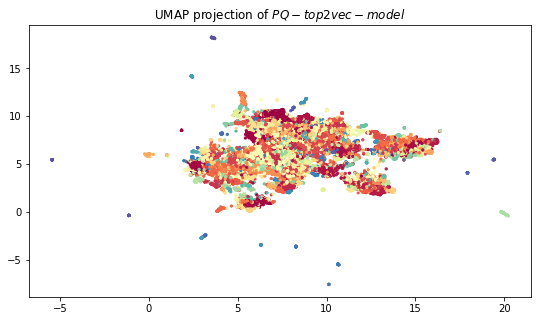

In [5]:
plt.figure(figsize=(9, 5))
plt.scatter(
    umap_model.embedding_[:, 0], umap_model.embedding_[:, 1], 
    c=model.doc_top, 
    cmap="Spectral", 
    s=5
)
plt.title("UMAP projection of $PQ-top2vec-model$")
plt.savefig(
    "./../reports/figures/matplotlib-simplest-form.png", 
    dpi=300, 
    bbox_inches="tight",
    pad_inches=0.3,
)
plt.show()

Colors represent the topic each document's been assigned to (47 topics in total)  

In [6]:
# how many documents each topic has?
model.topic_sizes

0      702
1      596
2      587
3      586
4      576
      ... 
210     21
211     18
212     17
213     17
214     17
Length: 215, dtype: int64

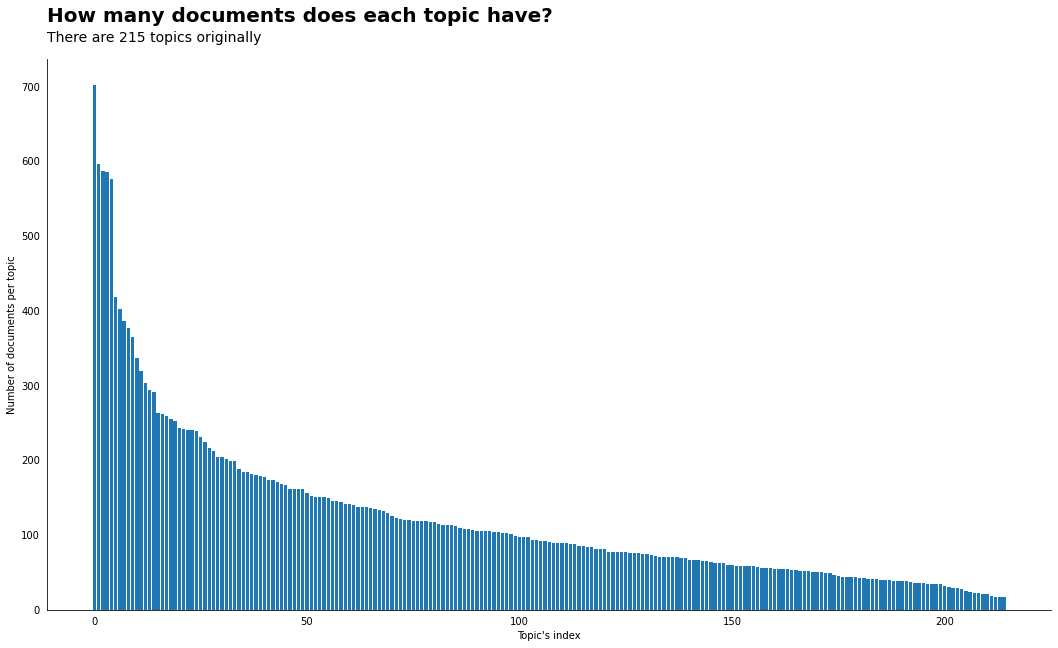

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(18, 9))

ax.bar(model.topic_sizes.index, model.topic_sizes.values, label="dist")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(bottom=False, left=False)

plt.ylabel("Number of documents per topic")
plt.xlabel("Topic's index")

fig.suptitle("How many documents does each topic have?", fontsize=20, fontweight='bold',x=0.125,ha='left')
fig.text(0.125,0.927,f"There are 215 topics originally",fontsize=14)
plt.subplots_adjust(top=0.9,bottom=0.05, wspace=0.1)
plt.savefig(
    "./../reports/figures/matplotlib-docs-distribution.png", 
    dpi=300, 
    bbox_inches="tight",
    pad_inches=0.3,
)

## UMAP plotting

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


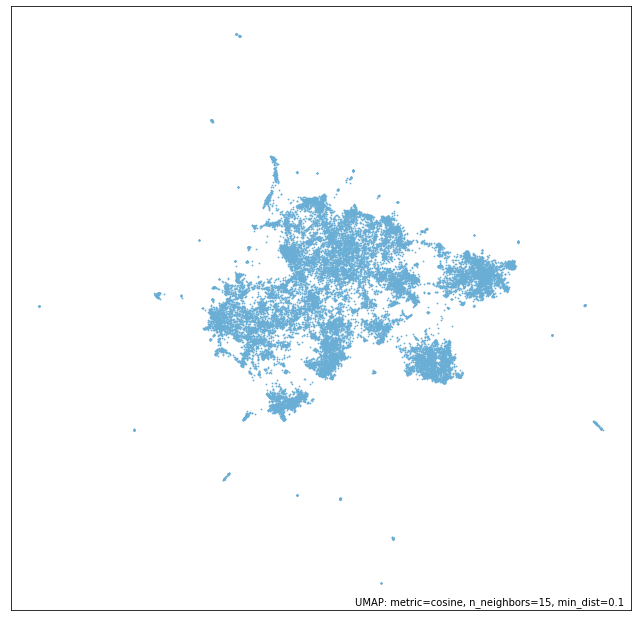

In [8]:
umap.plot.points(umap_model)
plt.savefig(
    "./../reports/figures/umap-points.png", 
    dpi=300, 
    bbox_inches="tight",
    pad_inches=0.3,
)

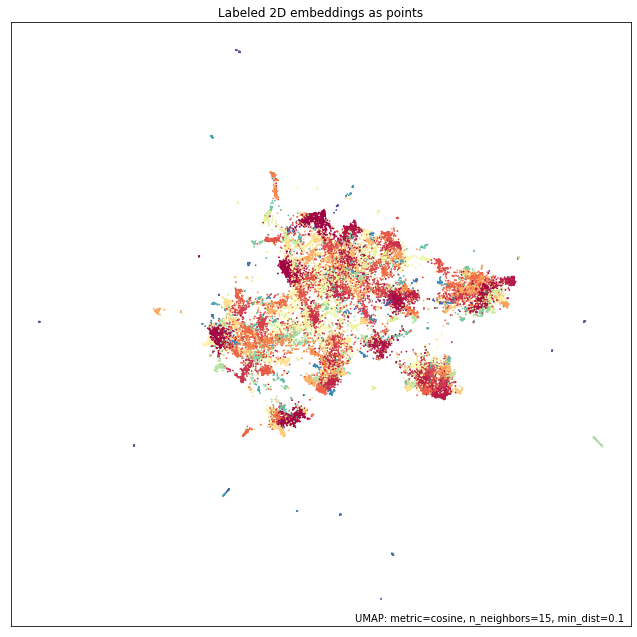

In [9]:
# the same but with labels
ax = umap.plot.points(umap_model, labels=model.doc_top)
ax.get_legend().remove()
ax.set_title("Labeled 2D embeddings as points")
plt.savefig(
    "./../reports/figures/umap-points-labeled.png", 
    dpi=300, 
    bbox_inches="tight",
    pad_inches=0.3,
)

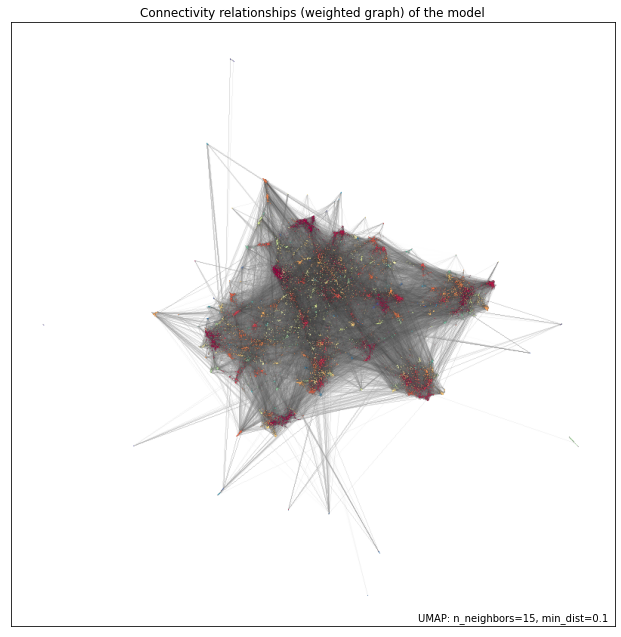

In [10]:
ax = umap.plot.connectivity(
    umap_model, 
    labels=model.doc_top, 
    show_points=True,  
)
ax.set_title("Connectivity relationships (weighted graph) of the model")
plt.savefig(
    "./../reports/figures/umap-connectivity.png", 
    dpi=300, 
    bbox_inches="tight",
    pad_inches=0.3,
)

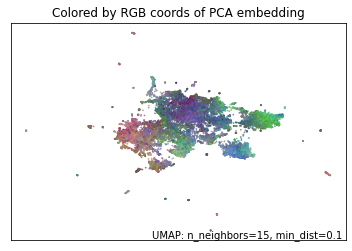

In [11]:
umap.plot.diagnostic(umap_model, diagnostic_type="pca")
plt.savefig(
    "./../reports/figures/umap-diagnostic-PCA.png", 
    dpi=300, 
    bbox_inches="tight",
    pad_inches=0.3,
)

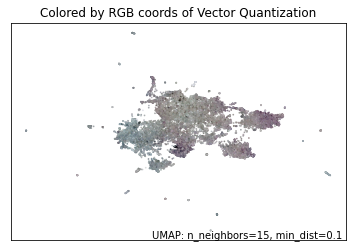

In [12]:
umap.plot.diagnostic(umap_model, diagnostic_type="vq")
plt.savefig(
    "./../reports/figures/umap-diagnostic-VQ.png", 
    dpi=300, 
    bbox_inches="tight",
    pad_inches=0.3,
)

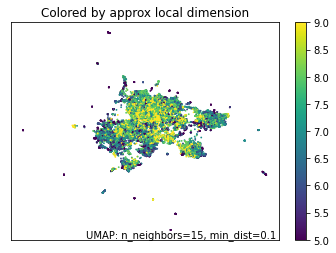

In [13]:
umap.plot.diagnostic(umap_model, diagnostic_type="local_dim")
plt.savefig(
    "./../reports/figures/umap-diagnostic-local-dim.png", 
    dpi=300, 
    bbox_inches="tight",
    pad_inches=0.3,
)

## Interactive

In [14]:
import pandas as pd
from bokeh.plotting import output_file, save
# from gensim.utils import simple_preprocess
# from gensim.parsing.preprocessing import strip_tags
# from collections import Counter

In [15]:
# def _tokenize(doc):
#     return simple_preprocess(strip_tags(doc), deacc=True)

In [16]:
hover_data = pd.DataFrame({
    "index": model.document_ids,
    "text": [doc[:250] for doc in model.documents],
    "doc_top": model.doc_top,
    "doc_dist": model.doc_dist
})

In [17]:
p = umap.plot.interactive(umap_model, labels=model.doc_top, hover_data=hover_data, point_size=2)
output_file("../reports/figures/bokeh.html")
save(p)

'C:\\github\\top2vec\\reports\\figures\\bokeh.html'